# Exercício 6
## Arthur Magalhães - 12629595

## Atividade 1

# Atividade 0 

Inicialize a semente de números aleatórios com seu número USP.

In [10]:
set.seed(12629595)

## Atividade 1
A tabela tab_virgo.dat contém também um indicador de metalicidade denominado Mg2, associado a uma banda de absorção do magnésio. Discuta se as propriedades químicas das galáxias early-type, descritas pelo Mg2, podem ser estimadas do brilho superficial e da dispersão de velocidades. Use mínimos quadrados para analisar a relação do Mg2 com o brilho superficial e a dispersão de velocidades, tanto com cada variável separadamente quanto com as duas juntas. Escreva suas conclusões.

## Plots e Análises

In [25]:
virgo <- read.table("tab_virgo.dat", header = TRUE)
#head(virgo)
virgo

# ID - identificacao da galaxia
# NAME - nome da galaxia
# S - outra identificação
# log_Dn - log do diâmetro da abertura circular (em arcsec) contendo o brilho superficial integrado mu_b = 20.75 mag/arcsec^2
# BT - magnitude total (extrapolada) na banda B
# log_ Ae - log do diâmetro (em arcsec) da abertura circular contendo metade da luz da galáxia na banda B - Ae/2 é o raio efetivo
# Sigmae - brilho superficial em mag/arcsec^2 dentro de Ae
# log_sigma - log da dispersão central de velocidades (km/s) da galáxia
# Mg2 - índice espectral Mg2 - indicador de metalicidade, medido no espectro da galáxias

ID,NAME,S,log_Dn,BT,log_Ae,Sigmae,log_sigma,Mg2
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
VI,N4239,245,1.258,13.56,1.528,21.69,1.716,0.148
V2,N4365,254,1.868,10.63,2.068,21.46,2.412,0.311
V3,N4374,255,2.028,10.15,2.028,20.78,2.480,0.310
V4,N4387,257,1.478,12.86,1.498,20.84,2.059,0.236
V5,N4406,258,1.978,9.88,2.278,21.76,2.355,0.299
V6,N4434,260,1.448,12.80,1.588,21.23,2.009,0.241
V7,N4458,261,1.378,12.73,1.758,22.01,1.949,0.212
V8,N4464,262,1.418,13.62,1.018,19.20,2.079,0.227
V9,N4472,265,2.118,9.51,2.228,21.14,2.474,0.335


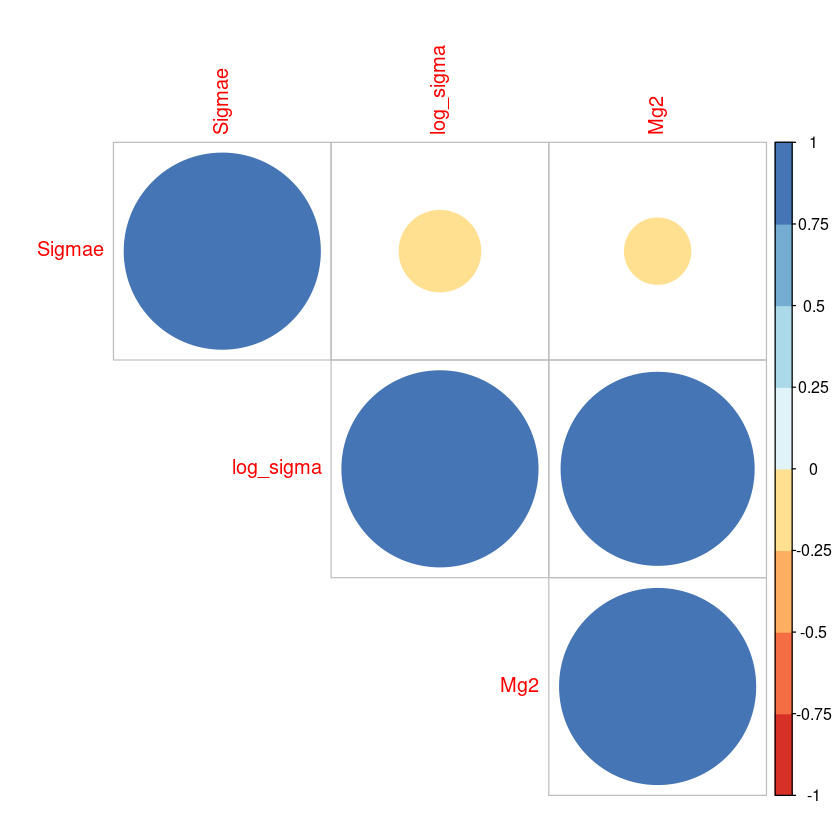

In [26]:
library(corrplot)
library(RColorBrewer)

M <-cor(virgo[,c(7:9)],method = 'pearson')  
corrplot(M, type="upper", order="hclust",
         col=brewer.pal(n=8, name="RdYlBu"))    

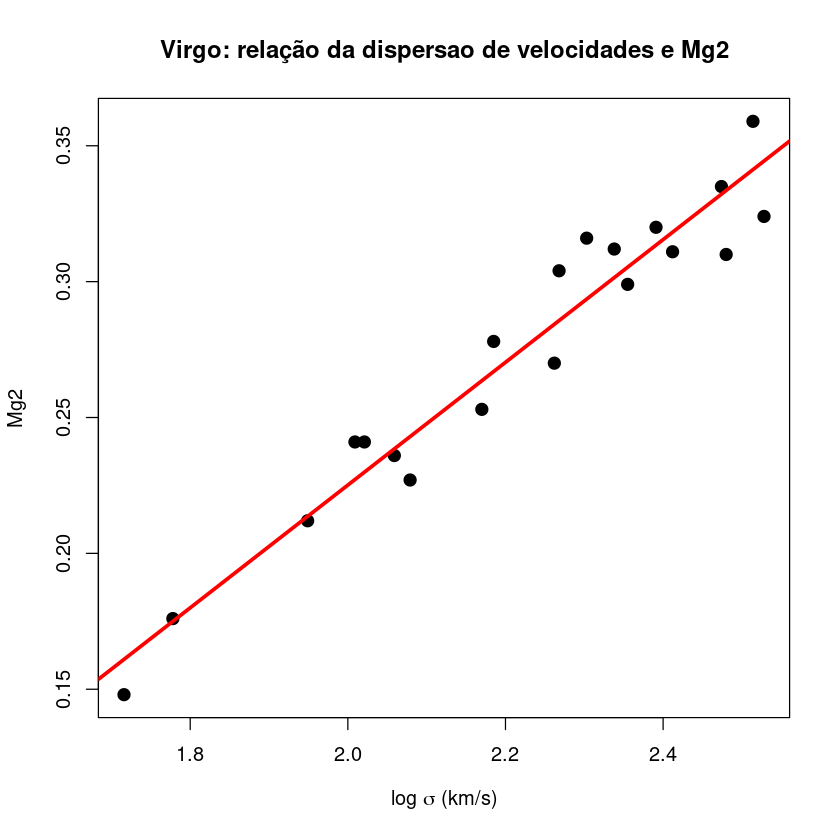

In [38]:
plot(virgo$log_sigma,virgo$Mg2,xlab=expression(paste('log ',sigma,' (km/s)')),ylab='Mg2',main='Virgo: relação da dispersao de velocidades e Mg2',pch = 20, cex=2)

# ajuste com lm()
fj = lm(virgo$Mg2 ~ virgo$log_sigma)
abline(fj,col='red',lwd=3)

In [33]:
summary(fj)


Call:
lm(formula = virgo$Mg2 ~ virgo$log_sigma)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0235555 -0.0111523 -0.0003106  0.0110847  0.0224224 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.22659    0.03018  -7.508 5.97e-07 ***
virgo$log_sigma  0.22586    0.01355  16.666 2.19e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01407 on 18 degrees of freedom
Multiple R-squared:  0.9391,	Adjusted R-squared:  0.9358 
F-statistic: 277.7 on 1 and 18 DF,  p-value: 2.187e-12


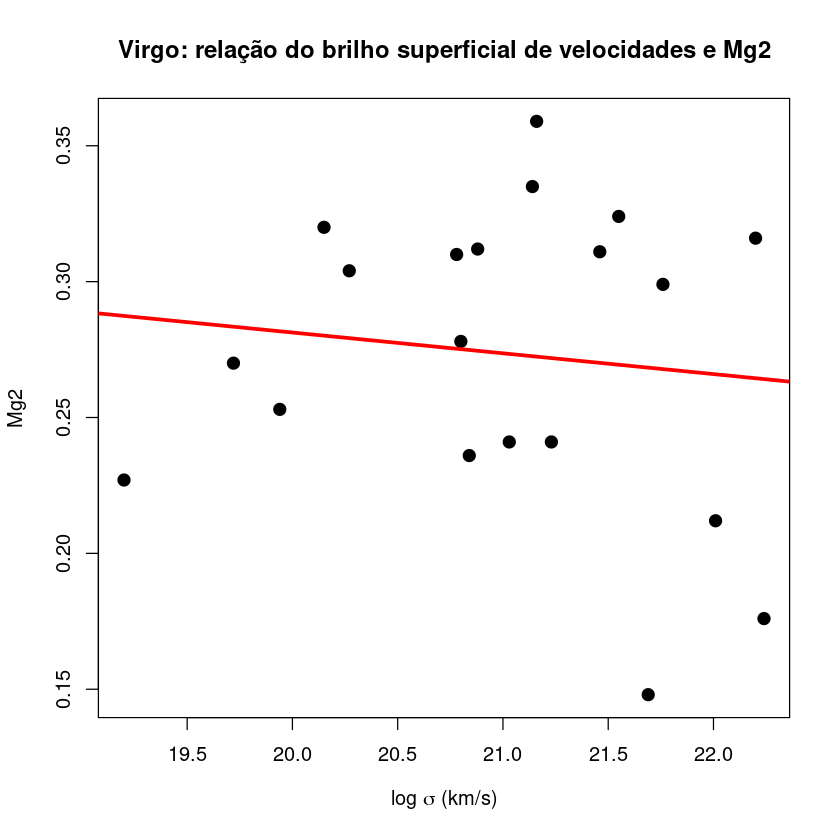

In [39]:
plot(virgo$Sigmae,virgo$Mg2,xlab=expression(paste('log ',sigma,' (km/s)')),ylab='Mg2',main='Virgo: relação do brilho superficial de velocidades e Mg2',pch = 20, cex=2)

# ajuste com lm()
fj2 = lm(virgo$Mg2 ~ virgo$Sigmae)
abline(fj2,col='red',lwd=3)

In [40]:
summary(fj2)


Call:
lm(formula = virgo$Mg2 ~ virgo$Sigmae)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12034 -0.03400  0.01383  0.04013  0.08660 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.434215   0.329756   1.317    0.204
virgo$Sigmae -0.007647   0.015689  -0.487    0.632

Residual standard error: 0.05668 on 18 degrees of freedom
Multiple R-squared:  0.01303,	Adjusted R-squared:  -0.0418 
F-statistic: 0.2376 on 1 and 18 DF,  p-value: 0.6318


In [43]:
z <- virgo$Mg2
x <- virgo$log_sigma
y <- virgo$Sigmae

# mínimos quadrados generalizado
# usa-se uma 'formula' do lm
pf = lm(z ~ x + y)
summary(pf)



Call:
lm(formula = z ~ x + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023324 -0.009331 -0.002051  0.011551  0.020893 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.308387   0.093733  -3.290  0.00432 ** 
x            0.228062   0.013817  16.506 6.72e-12 ***
y            0.003663   0.003972   0.922  0.36931    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01413 on 17 degrees of freedom
Multiple R-squared:  0.942,	Adjusted R-squared:  0.9352 
F-statistic: 138.1 on 2 and 17 DF,  p-value: 3.068e-11


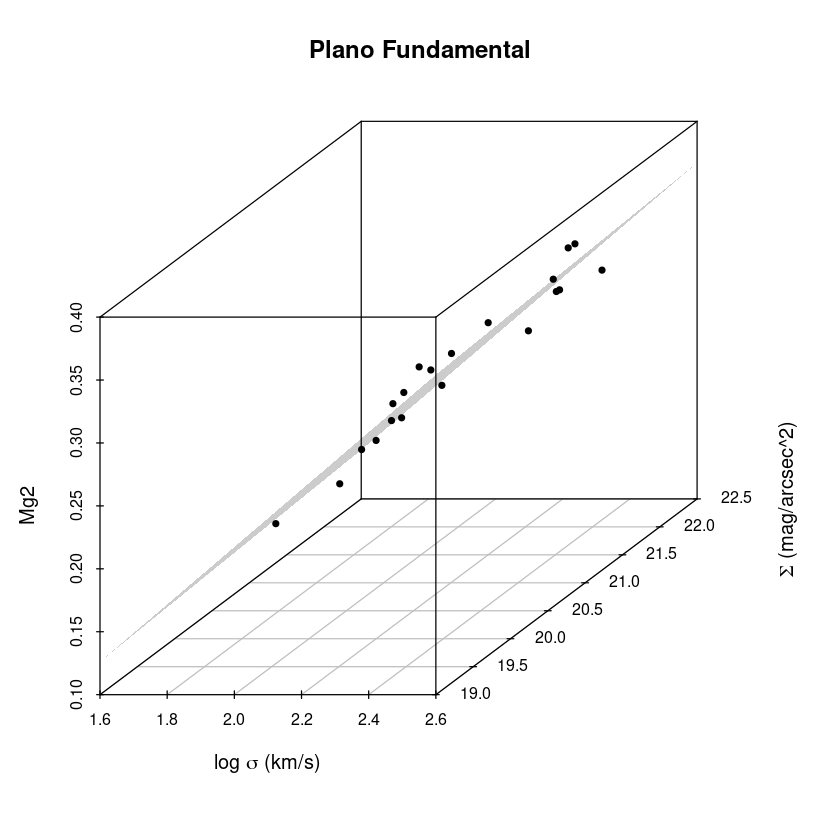

In [47]:
par(mfrow=c(1,1))
library("scatterplot3d")
G  <- scatterplot3d(x, y, z, highlight.3d = FALSE, type = "p", main = 'Plano Fundamental',xlab=expression(paste('log ',sigma,' (km/s)')),ylab=expression(paste(Sigma,' (mag/arcsec^2)')),zlab='Mg2',pch=20)
G$plane3d(pf, draw_polygon = TRUE, draw_lines = FALSE)



## Discussão & Resultados

O objetivo deste exercício foi analisar a correlação do índice espectral Mg2 com a dispersão de velocidades (log_sigma) e o brilho superficial (sigmae), por meio de ajustes de mínimos quadrados entre estas medidas.

Primeiramente eu plotei um gráfico de correlação, aprendido na aula 5, apenas para ver qual a tendência de correlação entre as medidas e já saber oque esperar. Com isto já tive a informação de que Mg2 e log(log_sigma) tem uma grande relação positiva enquanto Mg2 com sigmae não parecem estar relacionados.

Feito isto, prossegui para o ajuste de mínimos quadrados dos gráficos entre as medidas. Os valores de R-squared e p-value encontrados para cada uma das relações foi.

- Mg2 x log_sigma: $R^2= 0.9358$ e $p = 2.187e-12$ 
- Mg2 x sigmae: $R^2= -0.0418$ e $p = 0.6318$ 
- Mg2 x log_sigma x sigmae: $R^2= 0.9352$ e $p = 3.068e-11$ 


Visualmente pelos gráficos já conseguimos ver que nossa hipótese inicial de que  Mg2 x log_sigma tem uma forte correlação enquanto Mg2 x sigmae não estão relacionados, mas vendo os parâmetros de ajuste assim como o p-value de cada um esta relaçao de comprova. Podemos ver que o segundo caso apresente um $R^2$ muito pequeno e um p-value bem maior que os outros, mostrando que não existe essa correlação.


## Atividade 2

Use bootstrap para estimar o erro no expoente da função de massa de Salpeter. Como essas incertezas afetam a razão entre o número de estrelas formadas com 10 $M_\odot$
 em relação às com 1 $M_\odot$
? Discuta a distribuição dessa razão com os resultados do bootstrap.

## Ajustes de gráficos e Simulação Bootstrap

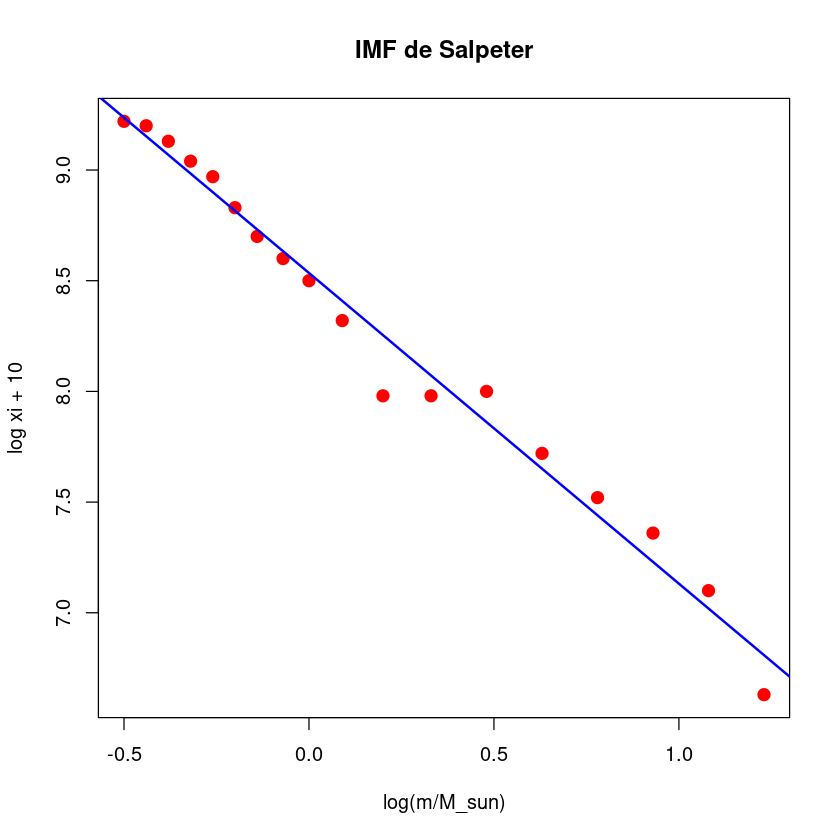

In [62]:
# x = log(m/M_sun) + 1
x = c(2.23,2.08,1.93,1.78,1.63,1.48,1.33,1.20,1.09,1.,0.93,0.86,0.80,0.74,0.68,0.62,0.56,0.50)

# x = log(m/M_sun)
x = x-1

# y = log xi + 10
y = c(6.63,7.10,7.36,7.52,7.72,8.00,7.98,7.98,8.32,8.50,8.60,8.70,8.83,8.97,9.04,9.13,9.20,9.22)

# modelo linear considerando todos os pontos
modelo=lm(y~x)

plot(x,y,main='IMF de Salpeter', xlab='log(m/M_sun)', ylab='log xi + 10',pch=20,cex=2,col='red')
abline(modelo,col='blue',lwd=2)

In [58]:
modelo


Call:
lm(formula = yl ~ xl)

Coefficients:
(Intercept)           xl  
      8.531       -1.346  


[1] 14

xl 
-1.345558

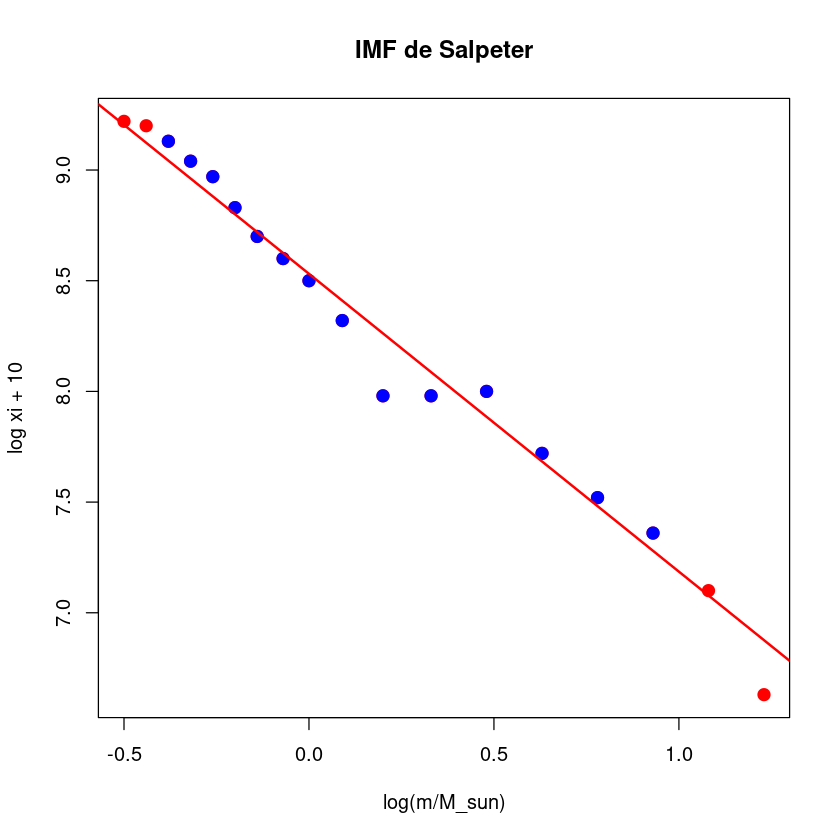

In [149]:
# no artigo, Salpeter considera apenas os pontos em -0.4 < log(m/M_sun) < 1 para fazer o ajuste:
xl = x[x > -0.4 & x < 1]
yl = y[x > -0.4 & x < 1]

# número de dados neste ajuste
length(xl)

# modelo linear considerando apenas os pontos em -0.4 < log(m/M_sun) < 1 
modelo=lm(yl~xl)
plot(x,y,main='IMF de Salpeter', xlab='log(m/M_sun)', ylab='log xi + 10',pch=20,cex=2,col='red')
points(xl,yl,col='blue',cex=2,pch=20)
abline(modelo,col='red',lwd=2)

alpha = modelo$coefficients[2]
alpha

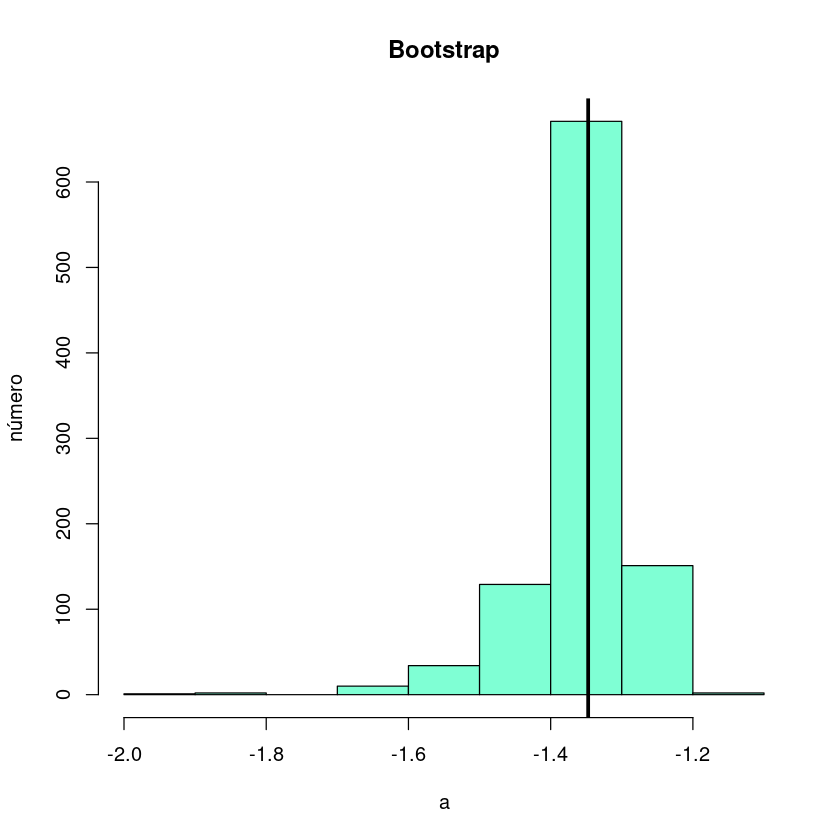

In [134]:
nboot = 1000

a = rep(0,nboot)
ind=seq(1,length(xl),1)

# simulações
for (i in 1:nboot) {
# resampling
# vamos usar sample() para criar um novo vetor de indicadores amostrando ind com substituição
novoind=sample(ind,length(ind), replace = TRUE)

# média ponderada
sx=xl[novoind]
sy=yl[novoind] 
    
a[i]=lm(sy~sx)$coefficients[2]
}
# fim das simulações

# visualização dos resultados da simulação:
hist(a,col='aquamarine',ylab='número',main='Bootstrap')
# valor médio dos dados:
abline(v=median(a),lwd=3)

In [150]:
summary(a)
erralpha = sd(a)
erralpha

ma = median(a)
ma

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.952  -1.378  -1.347  -1.357  -1.316  -1.167 

[1] 0.07403282

[1] -1.347269

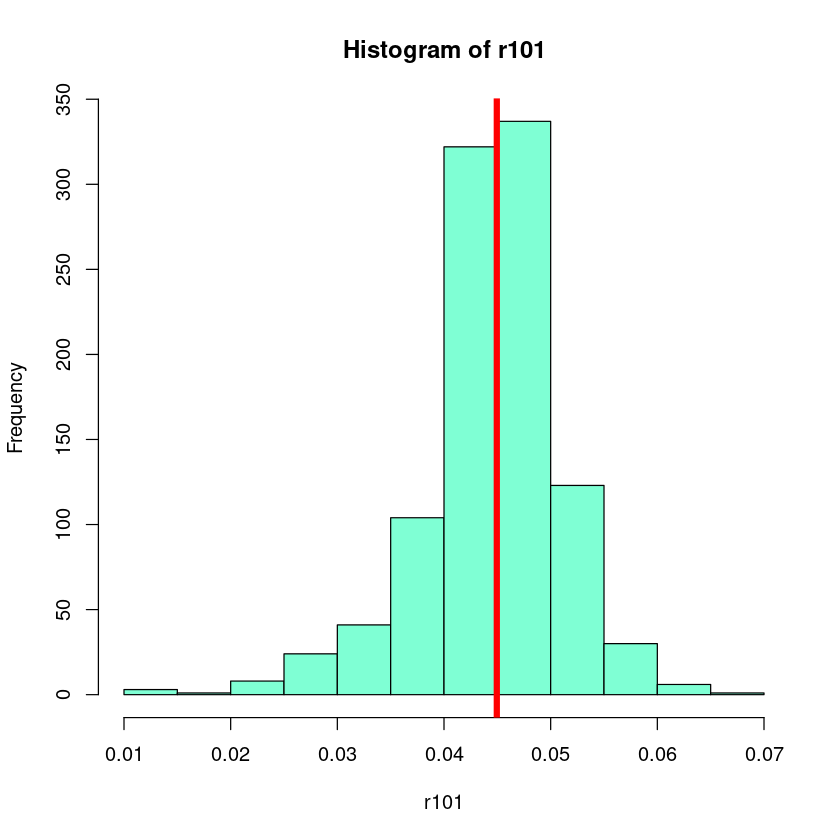

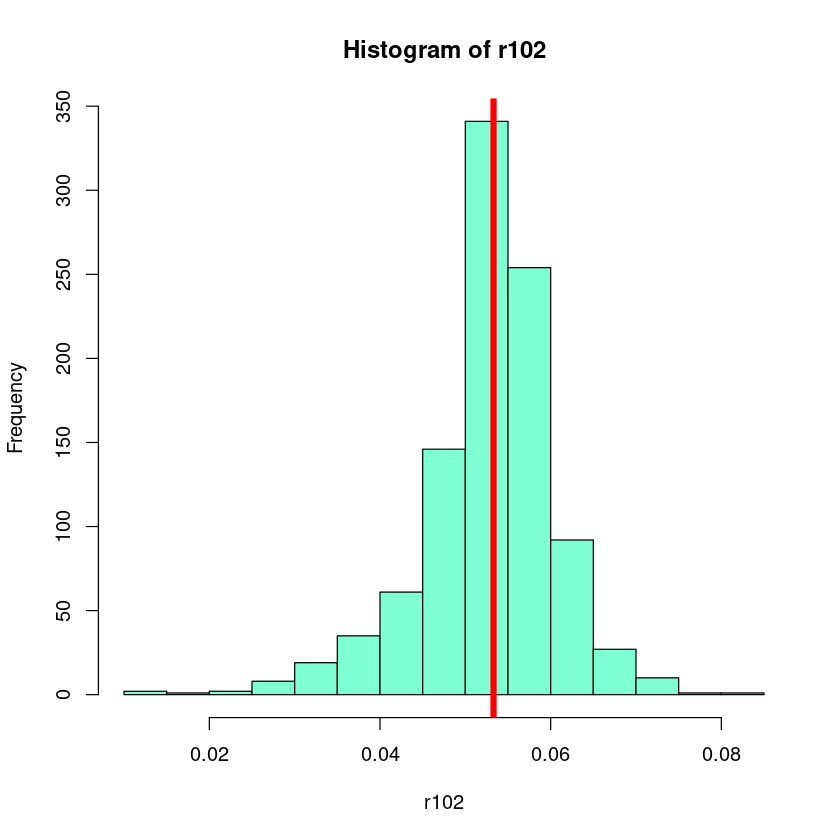

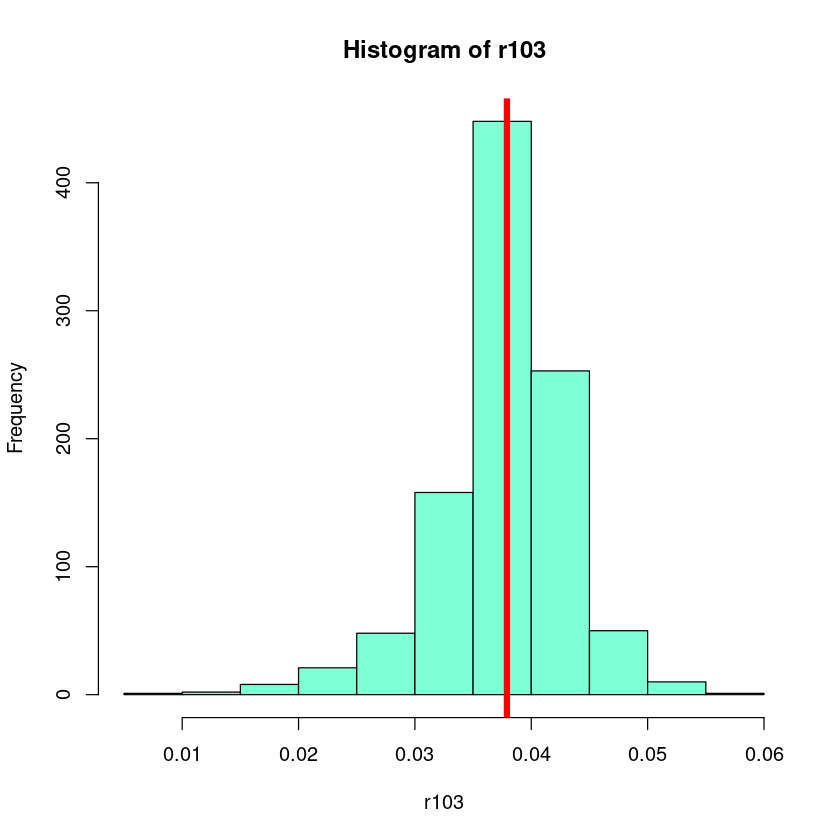

In [152]:
r101 = 10^a
hist(r101,col='aquamarine')
abline(v=median(r101), col='red', lw=5)

r102 = 10^(a+erralpha)
hist(r102,col='aquamarine')
abline(v=median(r102), col='red', lw=5)

r103 = 10^(a-erralpha)
hist(r103,col='aquamarine')
abline(v=median(r103), col='red', lw=5)

In [139]:
summary(r101)
summary(r102)
summary(r103)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01117 0.04187 0.04495 0.04449 0.04830 0.06815 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01325 0.04965 0.05330 0.05276 0.05727 0.08082 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.009423 0.035304 0.037905 0.037515 0.040728 0.057471 

## Resultados e Discussões

Neste exercício primeiramente tive que calcular um erro para o expoente da IMF de Salpeter, a função é dada por:

$\xi(M) = \xi_0 M^{\alpha} \qquad \text{Salpeter IMF}$


Para isso foi utilizado o método Bootstrap, de forma a criar conjuntos de tamanho fixo com componentes aleatórias das listas de medidas publicadas no artigo de Salpeter.

Com isso, a simulação foi rodada 1000 vezes, realizando diferentes ajustes para cada conjunto de dados, encontrando um $\alpha$ para cada um deles. No final encontramos os erros para $\alpha$ fazendo o desvio padrão da amostra, que resultou em:

- $\sigma_\alpha = 0.0740328179358831$

Também foi tirado a média da amostra, que comparado com o a medida experimental teve um resultado bem semelhante:

- $\alpha_{experimental} = -1.34555769767149 $
- $\alpha_{simulado} = -1.34726851604622$

Por fim, calculei, para cada um dos alphas encontrados, a razão entre o IMF para estrelas com 1$M_\odot$ e 10$M_\odot$. Repeti o mesmo cálculo para o $\alpha + \sigma_\alpha$ e $\alpha - \sigma_\alpha$, de forma a testar se há uma diferença significativa no $\alpha$ médio encontrado para cada um dos limites. Obtive então:

- Razão com ($\alpha$) = 0.04495
- Razão com ($\alpha + \sigma_\alpha$) = 0.05330
- Razão com ($\alpha - \sigma_\alpha$) = 0.037905


Podemos ver então os erros afetam a razão em torno de 20%.